**Department of Mathematics <br> 
College of Arts and Sciences, Howard University <br>
MATH 014 – Introduction to Data Science <br> 
FINAL PROJECT** <br> 

**Student Name:** Halia Benn <br>
**Student ID:** 004001244 <br> 
**Due date: 04-29-20**

---

**Topic: Global Housing Market Analysis (2015-2024)** <br>
(https://www.kaggle.com/datasets/atharvasoundankar/global-housing-market-analysis-2015-2024) <br> 
This dataset explores housing market trends across different countries from 2015 to 2024. The key features include house price index, rent index, mortgage rates, affordability ratio, economic indicators such as GDP growth, inflation, and urbanization rates.

---

## **DATA UNDERSTANING AND CLEANING**

##### Import all necessary Python libraries:

In [181]:
import pandas as pd 
print('Pandas imported as pd.')

import numpy as np  
print('Numpy imported as np.')

import matplotlib.pyplot as plt 
print('Matplotlib imported as plt.')

import seaborn as sns 
print('Matplotlib imported as sns.') 

import plotly.express as px
print('Plotly imported as px.') 

Pandas imported as pd.
Numpy imported as np.
Matplotlib imported as plt.
Matplotlib imported as sns.
Plotly imported as px.


---

##### Load in the dataset:

In [185]:
df = pd.read_csv('global_housing_market_extended.csv') 
print('Dataset "global_housing_market_extended.csv" loaded.')
 
df # print the first and last few rows for reference

Dataset "global_housing_market_extended.csv" loaded.


,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980515
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399
...,...,...,...,...,...,...,...,...,...,...,...
195,UAE,2020,160.153711,117.170365,7.390686,2.048681,4.061737,1.635019,1.955250,62.942477,109.059291
196,UAE,2021,95.004866,72.727315,9.636214,3.880091,2.943274,1.155810,0.608064,83.550496,141.366775
197,UAE,2022,175.533469,105.083237,5.838662,4.940674,3.344420,0.037365,1.943051,61.152790,142.140959
198,UAE,2023,126.147746,94.604103,8.934185,5.975589,4.638353,2.911469,-0.766718,75.552241,82.013520


### Understanding the Dataset 

---

##### Get a general idea of the dataset 

In [190]:
# get general info about the dataframe
print('Data types:\n') 
df.info()

Data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                200 non-null    object 
 1   Year                   200 non-null    int64  
 2   House Price Index      200 non-null    float64
 3   Rent Index             200 non-null    float64
 4   Affordability Ratio    200 non-null    float64
 5   Mortgage Rate (%)      200 non-null    float64
 6   Inflation Rate (%)     200 non-null    float64
 7   GDP Growth (%)         200 non-null    float64
 8   Population Growth (%)  200 non-null    float64
 9   Urbanization Rate (%)  200 non-null    float64
 10  Construction Index     200 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 17.3+ KB


One column has non-numerical data, one has integer data, and the rest has float data. The year column will need to be converted to categorical data. 

---

In [194]:
# get the shape of the dataset
print('\nShape of the dataset:\n', df.shape)


Shape of the dataset:
 (200, 11)


The dataset has 200 rows and 11 columns. 

---

In [198]:
# filter by certain columns to begin investigating the variables of housing affordability 
urbanization_by_year_country = df.groupby(['Year','Country'])['Urbanization Rate (%)'].mean().reset_index()
urbanization_by_year_country.head(20) # display the first 20 rows for every country in the first year 

,Year,Country,Urbanization Rate (%)
0,2015,Australia,67.274115
1,2015,Brazil,64.104559
2,2015,Canada,72.826231
3,2015,China,71.970081
4,2015,France,87.160519
5,2015,Germany,79.498918
6,2015,India,83.858019
7,2015,Italy,74.059819
8,2015,Japan,70.254521
9,2015,Mexico,63.209419


This shows what percent of each country's population is living in urban areas at the earliest year of the available data. For the United States in particular, it is important to question how its urbanization rate is one of the hightest in this grouping despite how it is considered to be one of the wealthiest countries in the world. 

In [201]:
# repeat the filtering for more insight
urbaization_by_year_country = df.groupby(['Year','Country'])['Urbanization Rate (%)'].mean().reset_index()
urbanization_by_year_country.tail(20) # the last 20 rows for every courntry in the last year 

,Year,Country,Urbanization Rate (%)
180,2024,Australia,63.728917
181,2024,Brazil,66.547617
182,2024,Canada,88.101900
183,2024,China,60.390058
184,2024,France,71.287788
185,2024,Germany,88.206907
186,2024,India,73.525181
187,2024,Italy,73.516324
188,2024,Japan,67.392061
189,2024,Mexico,61.926268


The spread of percentages looks similar to the first year of the data collected, because they seem to vary within the range of about 15% at most. 

In [204]:
# filter to investigate another variable by the countries
affordability_by_country = df.groupby(['Country'])['Affordability Ratio'].mean().reset_index()
print('Average Affordability Ratio by Country in 2015:\n')
affordability_by_country.head(20) # first 20 rows for all 20 countries in 2015 

Average Affordability Ratio by Country in 2015:



,Country,Affordability Ratio
0,Australia,6.359994
1,Brazil,5.822374
2,Canada,6.694199
3,China,6.122026
4,France,6.114604
5,Germany,6.101326
6,India,7.951057
7,Italy,7.471097
8,Japan,6.217082
9,Mexico,6.399821


Affordability Ratio measures the ratio between median rent and median income to indicate how achieveable housing is with the average salary. In this way, it seems that the larger the ratio, the less affordable. I am curious to look into the socio-cultural constructions of each society that work in tandem with its economic system. <br>

**For example**: In Brazil, it is much less common to live in suburban areas. This might contribute to the lower affordability ratio, if the houses are closer together in and neighborhoods are less exclusive. In contrast, suburbs are the goal of the American dream, which would contribute to the larger affordability ratio. 

In [207]:
# check for total number of null values 
print('Total number of null values:\n')
df.isnull().sum()

Total number of null values:



Country                  0
Year                     0
House Price Index        0
Rent Index               0
Affordability Ratio      0
Mortgage Rate (%)        0
Inflation Rate (%)       0
GDP Growth (%)           0
Population Growth (%)    0
Urbanization Rate (%)    0
Construction Index       0
dtype: int64

No null values in the datset.

---

## Data Cleaning

##### Since there are no missing values to handle, we can focus on other methods of data wrangling.

In [213]:
# create copy dataframe in order not to alter the original data in exploration
df_new = df.copy() 

---

##### We can start by checking to see if any of the columns need to be renamed:

In [217]:
# display the names of all columns
print('Column names:\n', df_new.columns)

Column names:
 Index(['Country', 'Year', 'House Price Index', 'Rent Index',
       'Affordability Ratio', 'Mortgage Rate (%)', 'Inflation Rate (%)',
       'GDP Growth (%)', 'Population Growth (%)', 'Urbanization Rate (%)',
       'Construction Index'],
      dtype='object')


Each column name looks clean and functional for analysis. No renaming required.

---

##### Next, we can check for duplicates:

In [222]:
print('Total number of duplicates in the dataset:\n', df.duplicated().sum())

Total number of duplicates in the dataset:
 0


No duplicate values in the dataset.

---

##### Next, we can convert the 'Year' column to categorical data.

In [227]:
# convert 'Year' from float to categorical 
df_new['Year'].astype('category')

0      2015
1      2016
2      2017
3      2018
4      2019
       ... 
195    2020
196    2021
197    2022
198    2023
199    2024
Name: Year, Length: 200, dtype: category
Categories (10, int64): [2015, 2016, 2017, 2018, ..., 2021, 2022, 2023, 2024]

Now, our Year column is in proper format. This is important because although years are numbers, they are categorical rather than numerical data.

---

#### Check for any invalid numeric column values

In [232]:
# summary statistics for Mortgage Rate column alone
print(f'Mortgage Rate Summary Stats:')
df_new['Mortgage Rate (%)'].describe()

Mortgage Rate Summary Stats:


count    200.000000
mean       4.150621
std        1.380222
min        1.537814
25%        3.045278
50%        4.329643
75%        5.217706
max        6.485623
Name: Mortgage Rate (%), dtype: float64

There are no negative mortgage rate values in the dataset, which would not make sense as a price.

---

In [236]:
# summary statistics for Rent Index column alone
print(f'Rent Index Summary Stats:')
df_new['Rent Index'].describe()

Rent Index Summary Stats:


count    200.000000
mean      83.048370
std       21.439858
min       50.354311
25%       60.466671
50%       83.721711
75%      100.604665
max      119.855388
Name: Rent Index, dtype: float64

It wouldn't make much sense if there were values of Rent Index close to zero. Luckily, this is not the case.

---

In [240]:
# summary statistics for Affordability Ratio column alone
print(f'Affordability Ratio Summary Stats:')
df_new['Affordability Ratio'].describe()

Affordability Ratio Summary Stats:


count    200.000000
mean       7.237768
std        2.576085
min        3.041688
25%        5.034207
50%        7.375697
75%        9.276196
max       11.879671
Name: Affordability Ratio, dtype: float64

It is good to see no negative values for the Affordability Ratio also.

---

## Additional Cleaning Steps

##### **Feature Engineering**

Most of the columns are in their most helpful form, so the most useful feature we can create is probably something towards comparison between countries. To get a regional understanding of the data, we could group the data by continent. 

#### Feature #1

In [248]:
# create a dictionary for the continents of the globe 
dict_continent= {'North America': ['USA','Canada','Mexico'], 
                 'South America':['Brazil'],
                 'Africa': 'South Africa', 
                 'Europe': ['Germany', 'France','Italy','Switzerland','Sweden','Netherlands', 'Spain', 'Germany','UK','Russia'],
                 'Asia': ['Japan','China','India', 'South Korea','UAE'],
                 'Australia': 'Australia'} 

# define a user-based function that will classify the Country column by the dictionary items 
def classify_country(country): 
    if country in dict_continent['North America']:   # loop-based logic to check if country is included in each dictionary item 
        return 'North America'
    elif country in dict_continent['South America']:   
        return 'South America'
    elif country in dict_continent['Africa']:
        return 'Africa'
    elif country in dict_continent['Europe']:
        return 'Europe'
    elif country in dict_continent['Asia']:
        return 'Asia'
    else: 
        return 'Oceania'

# create a new column that applies this function to the 'Country' column
df_new['Contintent'] = df_new['Country'].apply(classify_country)
df_new # print dataframe for reference 

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index,Contintent
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201,North America
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980515,North America
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903,North America
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788,North America
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
195,UAE,2020,160.153711,117.170365,7.390686,2.048681,4.061737,1.635019,1.955250,62.942477,109.059291,Asia
196,UAE,2021,95.004866,72.727315,9.636214,3.880091,2.943274,1.155810,0.608064,83.550496,141.366775,Asia
197,UAE,2022,175.533469,105.083237,5.838662,4.940674,3.344420,0.037365,1.943051,61.152790,142.140959,Asia
198,UAE,2023,126.147746,94.604103,8.934185,5.975589,4.638353,2.911469,-0.766718,75.552241,82.013520,Asia


**What it does:** <br>
* Groups the data by continents, based on the Country column
* Gives a more regional understanding of the data

**Why it helps:** 
This inherently facilitates analysis between countries by grouping them and inviting the association of them together on a world map. 

---

#### Feature #2

In [253]:
# create a dictionary to assign official codes to each country 
dict_country_code= {'USA': 'USA', 
                    'CAN':'Canada',
                    'CHE': 'Switzerland', 
                    'SWE': 'Sweden',
                    'NLD': 'Netherlands',
                    'RUS': 'Russia',
                    'ZAF':'South Africa',
                    'MEX' : 'Mexico',
                    'KOR': 'South Korea',
                    'BRA': 'Brazil',
                    'JPN': 'Japan',
                    'CHN': 'China',
                    'IND': 'India',
                    'AUS': 'Australia',
                    'ESP': 'Spain',
                    'ITA': 'Italy',
                    'FRA': 'France',
                    'DEU': 'Germany',
                    'GBR': 'UK',
                    'ARE': 'UAE'} 

#define a user-based function to classify the Country column by the new code dictionary 
def classify_country_code(country_code):
    if country_code in dict_country_code['USA']:
        return 'USA'
    elif country_code in dict_country_code['CAN']:
        return 'CAN'
    elif country_code in dict_country_code['CHE']:
        return 'CHE'
    elif country_code in dict_country_code['SWE']:
        return 'SWE'
    elif country_code in dict_country_code['NLD']:
        return 'NLD'
    elif country_code in dict_country_code['RUS']:
        return 'RUS' 
    elif country_code in dict_country_code['ZAF']:
        return 'ZAF'
    elif country_code in dict_country_code['MEX']:
        return 'MEX'
    elif country_code in dict_country_code['KOR']:
        return 'KOR'
    elif country_code in dict_country_code['BRA']:
        return 'BRA'
    elif country_code in dict_country_code['JPN']:
        return 'JPN'
    elif country_code in dict_country_code['CHN']:
        return 'CHN'
    elif country_code in dict_country_code['IND']:
        return 'IND'
    elif country_code in dict_country_code['AUS']:
        return 'AUS'
    elif country_code in dict_country_code['ESP']:
        return 'ESP'
    elif country_code in dict_country_code['ITA']:
        return 'ITA'
    elif country_code in dict_country_code['FRA']:
        return 'FRA'
    elif country_code in dict_country_code['DEU']:
        return 'DEU'
    elif country_code in dict_country_code['GBR']:
        return 'GBR'
    else:
        return 'ARE'

# create a column that applies this user-based function to the Country column
df_new['Code'] = df_new['Country'].apply(classify_country_code)
df_new # print dataframe for reference

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index,Contintent,Code
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201,North America,USA
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980515,North America,USA
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903,North America,USA
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788,North America,USA
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399,North America,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,UAE,2020,160.153711,117.170365,7.390686,2.048681,4.061737,1.635019,1.955250,62.942477,109.059291,Asia,ARE
196,UAE,2021,95.004866,72.727315,9.636214,3.880091,2.943274,1.155810,0.608064,83.550496,141.366775,Asia,ARE
197,UAE,2022,175.533469,105.083237,5.838662,4.940674,3.344420,0.037365,1.943051,61.152790,142.140959,Asia,ARE
198,UAE,2023,126.147746,94.604103,8.934185,5.975589,4.638353,2.911469,-0.766718,75.552241,82.013520,Asia,ARE


**What this does:** 
* Creates a column that assigns each country to its official 3-letter country code 

**Why it helps:**
This is imperative for later visualization, where we will make a geomap. The geomap will recognize these official codes to assign the countries to their respective locations on the map.

In [256]:
# check to make sure the codes registered for all 20 countries
df_new['Code'].value_counts()

Code
USA    10
CAN    10
CHE    10
SWE    10
NLD    10
RUS    10
ZAF    10
MEX    10
KOR    10
BRA    10
JPN    10
CHN    10
IND    10
AUS    10
ESP    10
ITA    10
FRA    10
DEU    10
GBR    10
ARE    10
Name: count, dtype: int64

---

## **EXPLORATORY DATA ANALYSIS**

Now we can look further into the summaries and statistics of the variables to see how the data behaves.

In [261]:
# summary statistics of the entire dataset
print('Summary statistics:\n')
df_new.describe()

Summary statistics:



,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2019.500000,130.381022,83.048370,7.237768,4.150621,3.649756,2.133722,0.722806,74.769891,111.204257
std,2.879489,28.752229,21.439858,2.576085,1.380222,1.881938,2.413270,1.035691,8.734246,24.309473
min,2015.000000,80.552212,50.354311,3.041688,1.537814,0.532110,-1.921833,-0.961391,60.172760,70.968678
25%,2017.000000,104.142562,60.466671,5.034207,3.045278,1.939199,-0.095628,-0.183320,66.923842,90.182198
50%,2019.500000,129.193653,83.721711,7.375697,4.329643,3.664625,2.307548,0.722372,75.100060,110.593807
75%,2022.000000,157.127098,100.604665,9.276196,5.217706,5.261720,4.272776,1.621317,82.677430,133.780445
max,2024.000000,179.971767,119.855388,11.879671,6.485623,6.912349,5.958931,2.497948,89.788944,149.735748


This gives a general understanding of the variables' statistics.

---

In [265]:
# check the value counts for the Country column
print('Unique value counts for Country:')
df['Country'].value_counts()

Unique value counts for Country:


Country
USA             10
Canada          10
Switzerland     10
Sweden          10
Netherlands     10
Russia          10
South Africa    10
Mexico          10
South Korea     10
Brazil          10
Japan           10
China           10
India           10
Australia       10
Spain           10
Italy           10
France          10
Germany         10
UK              10
UAE             10
Name: count, dtype: int64

There are 20 countries, each with 10 data entries for the years 2015 - 2024. This gives a good spread of data around the globe and does not require any aggregation to compare the countries with each other. 

---

### Summary of affordability and housing indicators 

**Affordability**

Measures of Central Tendency:

In [272]:
# Calculate the mean
affordability_mean= df_new['Affordability Ratio'].mean()
# Calculate the median
affordability_median = df_new['Affordability Ratio'].median()
# Calculate the mode
affordability_mode = df_new['Affordability Ratio'].mode()

# Print the results
print('Measures of Central Tendency for Affordability Ratio:\n')
print(f"Mean: {affordability_mean}")
print(f"Median: {affordability_median}")
print(f"Mode: {affordability_mode[0]}")

Measures of Central Tendency for Affordability Ratio:

Mean: 7.237768305220514
Median: 7.375696631028227
Mode: 3.041688207041425


Measures of Dispersion:

In [319]:
# Find the maximum 
affordability_max = df_new['Affordability Ratio'].max()
# Find the minimum
affordability_min = df_new['Affordability Ratio'].min()
# Find the range
affordability_range = affordability_max-affordability_min
# Find the variance
affordability_variance = df_new['Affordability Ratio'].var()
# Find the standard deviation
affordability_std_dev = df_new['Affordability Ratio'].std()

print('Measures of Dispersion for Affordability Ratio:\n')
print(f'Maximum: {affordability_max:.2f}')
print(f'Minimum: {affordability_min:.2f}')
print(f'Range: {affordability_range:.2f}')
print(f'Variance: {affordability_variance:.2f}')
print(f'Standard Deviation: {affordability_std_dev:.2f}')

Measures of Dispersion for Affordability Ratio:

Maximum: 11.88
Minimum: 3.04
Range: 8.84
Variance: 6.64
Standard Deviation: 2.58


**Summary of findings for Affordability Ratio column**:
* I am surprised that the mean and median are a much larger than the mode. On average across all counteries and years, housing is less affordable but the most frequent value is much more affordable.
* The range of the affordability ratio is 8.84. Although it is not a large distance between 3.04 and 11.88, it is significant because it is a ratio. This could indicate a large difference between thousands of dollars, for example.
* The low standard deviation indicates that there is less variablilty in the data 

---

**House Price Index**

Measures of Central Tendency:

In [281]:
# Calculate the mean
house_price_mean= df_new['House Price Index'].mean()
# Calculate the median
house_price_median = df_new['House Price Index'].median()
# Calculate the mode
house_price_mode = df_new['House Price Index'].mode()

# Print the results
print('Measures of Central Tendency for House Price Index:\n')
print(f"Mean: {house_price_mean}")
print(f"Median: {house_price_median}")
print(f"Mode: {house_price_mode[0]}")

Measures of Central Tendency for House Price Index:

Mean: 130.38102201524072
Median: 129.19365324900724
Mode: 80.55221171236025


Measures of Dispersion:

In [321]:
# Find the maximum 
house_price_max = df_new['House Price Index'].max()
# Find the minimum
house_price_min = df_new['House Price Index'].min()
# Find the range
house_price_range = house_price_max-house_price_min
# Find the variance
house_price_variance = df_new['House Price Index'].var()
# Find the standard deviation
house_price_std_dev = df_new['House Price Index'].std()

print('Measures of Dispersion for House Price Index:\n')
print(f'Maximum: {house_price_max:.2f}')
print(f'Minimum: {house_price_min:.2f}')
print(f'Range: {house_price_range:.2f}')
print(f'Variance: {house_price_variance:.2f}')
print(f'Standard Deviation: {house_price_std_dev:.2f}')

Measures of Dispersion for House Price Index:

Maximum: 179.97
Minimum: 80.55
Range: 99.42
Variance: 826.69
Standard Deviation: 28.75


**Summary of findings for House Price Index column**:
* The House Price Index is more a measurement of the increase in housing prices than the housing prices themselves
*  Although the mean and median are similar in value, the median is more often used in housing market data, because it gives a more accurate value for the average home price than the mean that would be more affected by outliers. 

---

**Rent Index**

In [311]:
# Calculate the mean
rent_index_mean= df_new['Rent Index'].mean()
# Calculate the median
rent_index_median = df_new['Rent Index'].median()
# Calculate the mode
rent_index_mode = df_new['Rent Index'].mode()

# Print the results
print('Measures of Central Tendency for Rent Index:\n')
print(f"Mean: {rent_index_mean}")
print(f"Median: {rent_index_median}")
print(f"Mode: {rent_index_mode[0]}")

Measures of Central Tendency for Rent Index:

Mean: 83.04837026700993
Median: 83.7217109602357
Mode: 50.354310869235306


In [323]:
# Find the maximum 
rent_index_max = df_new['Rent Index'].max()
# Find the minimum
rent_index_min = df_new['Rent Index'].min()
# Find the range
rent_index_range = rent_index_max-rent_index_min
# Find the variance
rent_index_variance = df_new['Rent Index'].var()
# Find the standard deviation
rent_index_std_dev = df_new['Rent Index'].std()

print('Measures of Dispersion for Rent Index:\n')
print(f'Maximum: {rent_index_max:.2f}')
print(f'Minimum: {rent_index_min:.2f}')
print(f'Range: {rent_index_range:.2f}')
print(f'Variance: {rent_index_variance:.2f}')
print(f'Standard Deviation: {rent_index_std_dev:.2f}')

Measures of Dispersion for Rent Index:

Maximum: 119.86
Minimum: 50.35
Range: 69.50
Variance: 459.67
Standard Deviation: 21.44


**Summary of findings for Rent Index column**:
* The rent has a smaller range than the house price. This could be because of the more standard guidelines and often more compact nature of rent-based living in comparison to the homes that are often more exclusive and owned by individuals with more freedom
* There is a high variance but a relatively low standard deviation on a global scale, which could make sense that there is a lot of variation for individual data points, but less so when analyzed in groups, for example, countries that would compile different years rent index changes

---

**Mortgage Rate**

In [325]:
# Calculate the mean
mortgage_rate_mean= df_new['Mortgage Rate (%)'].mean()
# Calculate the median
mortgage_rate_median = df_new['Mortgage Rate (%)'].median()
# Calculate the mode
mortgage_rate_mode = df_new['Mortgage Rate (%)'].mode()

# Print the results
print('Measures of Central Tendency for Mortgage Rate::\n')
print(f"Mean: {mortgage_rate_mean}")
print(f"Median: {mortgage_rate_median}")
print(f"Mode: {mortgage_rate_mode[0]}")

Measures of Central Tendency for Mortgage Rate::

Mean: 4.150621338465188
Median: 4.32964348562321
Mode: 1.5378143748907105


Measures of Dispersion

In [329]:
# Find the maximum 
mortgage_rate_max = df_new['Mortgage Rate (%)'].max()
# Find the minimum
mortgage_rate_min = df_new['Mortgage Rate (%)'].min()
# Find the range
mortgage_rate_range = mortgage_rate_max-mortgage_rate_min
# Find the variance
mortgage_rate_variance = df_new['Mortgage Rate (%)'].var()
# Find the standard deviation
mortgage_rate_std_dev = df_new['Mortgage Rate (%)'].std()

print('Measures of Dispersion for Mortgage Rate:\n')
print(f'Maximum: {mortgage_rate_max:.2f}')
print(f'Minimum: {mortgage_rate_min:.2f}')
print(f'Range: {mortgage_rate_range:.2f}')
print(f'Variance: {mortgage_rate_variance:.2f}')
print(f'Standard Deviation: {mortgage_rate_std_dev:.2f}')

Measures of Dispersion for Mortgage Rate:

Maximum: 6.49
Minimum: 1.54
Range: 4.95
Variance: 1.91
Standard Deviation: 1.38


**Summary of findings for Mortgage Rate column**:
* Mortgage Rate measures the average mortgage interest rate percentage
* There seems to be a standard and a pretty sturdy adherence to it, based on the short range and low standard deviation.

---

#### Identifying Temporal Anomalies

Box plots are a way to visually identify anomalies, such as outliers. I find this to be the easiest for getting a general idea of what kinds of anomalies are significant to the dataset. The year column is our temporal measurement.

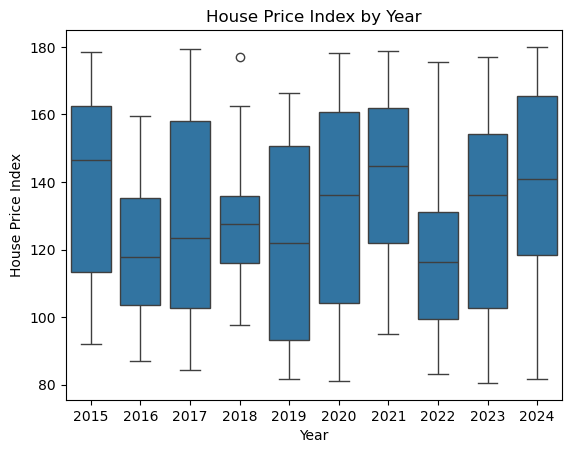

<Figure size 640x480 with 0 Axes>

In [680]:
# boxplot to reveal outliers in House Price Index by Year 
sns.boxplot(data=df_new, x='Year',y='House Price Index')
plt.title('House Price Index by Year') # add a title 
plt.ylabel('House Price Index') # add label for the y-axis
plt.xlabel('Year') # add label for the x-axis
plt.show() # display the graph

plt.savefig("final_anomalie_temporal1.png")

There is one outlier in for the year 2018. This means that there was (one country with) an irregularly high increase in house prices included in the range of house prices for the year. It also has the smallest interquartile range of the years. 

---

We can find this value by referenceing the summary statistics 

In [366]:
# filter the House Price Index by Year
house_price_by_year = df_new.groupby('Year')['House Price Index']

# generate summary statistics for this filter 
house_price_by_year.describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,20.0,139.227551,30.059318,91.959425,113.362669,146.513825,162.377874,178.484120
2016,20.0,120.354279,22.630658,86.936130,103.730300,117.848829,135.403752,159.579267
2017,20.0,130.374609,30.506232,84.341253,102.749758,123.553996,158.198116,179.248350
2018,20.0,127.793459,21.499087,97.743954,115.945216,127.585468,135.737702,176.887786
2019,20.0,123.056015,31.538771,81.839068,93.317682,122.085002,150.583981,166.204265
2020,20.0,132.257842,30.173486,81.099583,104.302864,136.037353,160.837368,178.237862
2021,20.0,142.144052,25.465923,95.004866,121.948812,144.782087,161.946596,178.778552
2022,20.0,120.314413,28.031097,83.113408,99.342865,116.345601,131.224822,175.533469
2023,20.0,130.116069,30.926807,80.552212,102.800516,136.205337,154.149743,176.991440


The value of the extremity should me the maximum, which is 176.887786.

---

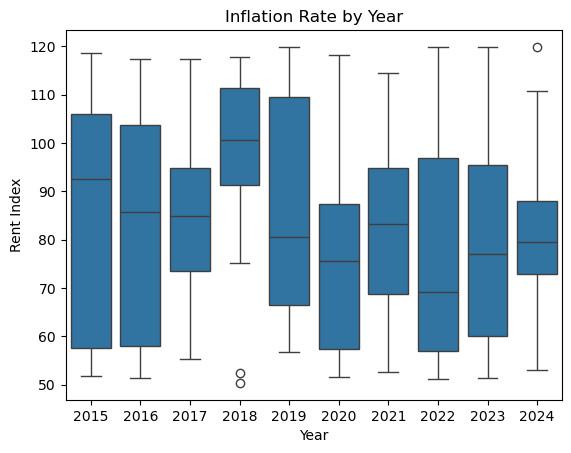

<Figure size 640x480 with 0 Axes>

In [678]:
# boxplot to reveal outliers in the Inflation Rate column
sns.boxplot(data=df_new, x='Year',y='Rent Index') 
plt.title('Inflation Rate by Year') 
plt.ylabel('Rent Index') 
plt.xlabel('Year')
plt.show() 
plt.savefig("final_anomalie_temporal2.png")

There are two outliers in 2018 and one in 2024. There were two (countries with an) irregularly low house price increases in 2018 and one (country with an) irregularly high house price increase in 2024. 

In [370]:
#  filter the Rent Index by Year
rent_index_by_year = df_new.groupby('Year')['Rent Index']

# generate summary statistics for this grouping
rent_index_by_year.describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,20.0,86.065883,23.913146,51.857254,57.600622,92.577795,106.048837,118.683032
2016,20.0,82.038687,25.060209,51.404984,57.933743,85.606839,103.748510,117.409440
2017,20.0,85.666517,16.875483,55.388594,73.478086,84.906562,94.770943,117.425578
2018,20.0,95.911099,19.371616,50.354311,91.262061,100.598536,111.334339,117.851177
2019,20.0,85.336782,22.926008,56.687472,66.452117,80.621386,109.401629,119.781198
2020,20.0,76.429322,20.866498,51.654701,57.404311,75.517682,87.450490,118.110739
2021,20.0,81.627154,17.408779,52.582086,68.841451,83.200738,94.785222,114.531196
2022,20.0,76.633595,24.564896,51.081963,57.036212,69.178697,96.888438,119.855388
2023,20.0,79.526352,21.405266,51.276281,60.036891,77.046708,95.355541,119.743374


The outlier seen for 2024 is 119.764579. One of the values for 2018 is 117.851177. 

---

#### Identifying Regional Anomalies

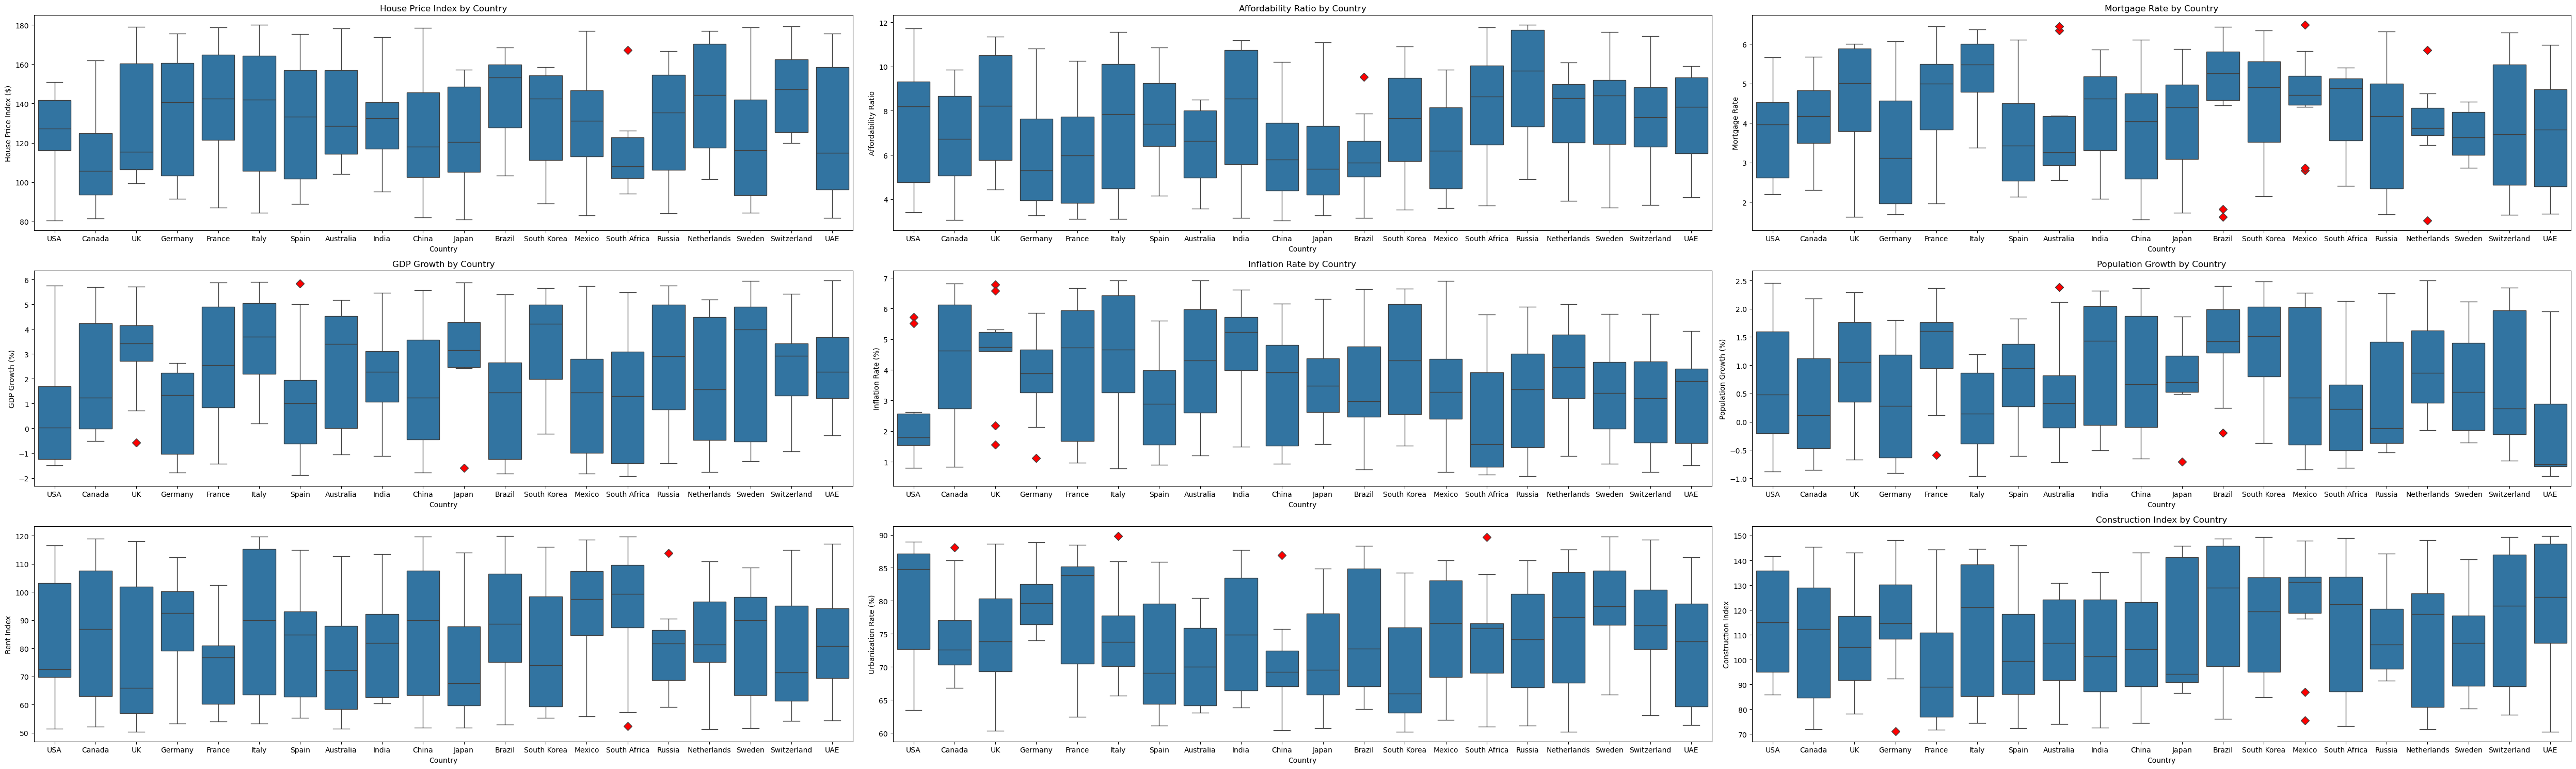

<Figure size 640x480 with 0 Axes>

In [676]:
# create subplots (3 rows, 3 columns) to show graphs alongside each other
fig, axes = plt.subplots(3, 3, figsize=(50, 15))

# Plot 1: Boxplot of Hpuse Price Index by Country 
sns.boxplot(x='Country',y='House Price Index', data=df_new, 
            flierprops=dict(markerfacecolor='red', marker='D', markersize=8), 
            ax=axes[0, 0]) 
axes[0, 0].set_title('House Price Index by Country')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('House Price Index ($)')


# Plot 2: Barplot of Affordability Ratio by Country 
sns.boxplot(x='Country',y='Affordability Ratio', data=df_new, 
            flierprops=dict(markerfacecolor='red', marker='D', markersize=8),
            ax=axes[0, 1])
axes[0, 1].set_title('Affordability Ratio by Country')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Affordability Ratio')


# Plot 3: Barplot of Mortgage Rate by Country
sns.boxplot(x='Country',y='Mortgage Rate (%)', data=df_new, 
            flierprops=dict(markerfacecolor='red', marker='D', markersize=8),
            ax=axes[0, 2])
axes[0, 2].set_title('Mortgage Rate by Country')
axes[0, 2].set_xlabel('Country')
axes[0, 2].set_ylabel('Mortgage Rate')


# Plot 4: Barplot of GDP Growth by Country
sns.boxplot(x='Country',y='GDP Growth (%)', data=df_new,
            flierprops=dict(markerfacecolor='red', marker='D', markersize=8), 
            ax=axes[1, 0])
axes[1, 0].set_title('GDP Growth by Country')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('GDP Growth (%)')

# Plot 5: Barplot of Inflation Rate by Country
sns.boxplot(x='Country',y='Inflation Rate (%)', data=df_new, 
            flierprops=dict(markerfacecolor='red', marker='D', markersize=8),
            ax=axes[1, 1])
axes[1, 1].set_title('Inflation Rate by Country')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Inflation Rate (%)')

# Plot 6: Barplot of 
sns.boxplot(x='Country',y='Population Growth (%)', data=df_new, 
            flierprops=dict(markerfacecolor='red', marker='D', markersize=8),
            ax=axes[1, 2])
axes[1, 2].set_title('Population Growth by Country')
axes[1, 2].set_xlabel('Country')
axes[1, 2].set_ylabel('Population Growth (%)')

# Plot 7: Barplot of Rent Index by Country
sns.boxplot(x='Country',y='Rent Index', data=df_new, 
            flierprops=dict(markerfacecolor='red', marker='D', markersize=8),
            ax=axes[2, 0])
axes[2, 2].set_title('Rent Index by Country')
axes[2, 2].set_xlabel('Country')
axes[2, 2].set_ylabel('Rent Index')

# Plot 8: Barplot of Urbanization Rate by Country
sns.boxplot(x='Country',y='Urbanization Rate (%)', data=df_new, 
            flierprops=dict(markerfacecolor='red', marker='D', markersize=8), 
            ax=axes[2, 1])
axes[2, 2].set_title('Urbanization Rate by Country')
axes[2, 2].set_xlabel('Country')
axes[2, 2].set_ylabel('Urbanization Rate (%)')

# Plot 9: Barplot of Construction Index by Country
sns.boxplot(x='Country',y='Construction Index', data=df_new, 
            flierprops=dict(markerfacecolor='red', marker='D', markersize=8),
            ax=axes[2, 2])
axes[2, 2].set_title('Construction Index by Country')
axes[2, 2].set_xlabel('Country')
axes[2, 2].set_ylabel('Construction Index')

# Adjust layout for better spacing
plt.tight_layout() 

plt.show()

plt.savefig("final_anomalie_regional.png")

**Key insights**: 
These graphs are very small, but they give an overview of the types of anomalies that we can visually identify in regional analysis. 

* The outliers often appear on plotpoints with smaller interquartile ranges. This is because if the mid 50% of the data has a smaller range, it is much more likely that extreme values will be outliers.
    * For example: in the Inflation Rate vs. Country graph, the short interquartile range and whiskers of the UK plot indicates that its inflation rate has much less variability. The outliers indicate that there were two years in which the inflation rate was very irregularly high, and two years that were very irregularly low.
* Overall, the majority of data has a longer interquartile range and more variability, meaning that most countries have seen a good amount of changes in each variable from 2015 - 2024.


---

## **DATA VISUALIZATION AND INTERPRETATION**

Now that we've warmed up with some boxplots, let's get into the real data visualization.

A correlation matrix is a great place to start with, to visualize the relationships between all of the variables. 

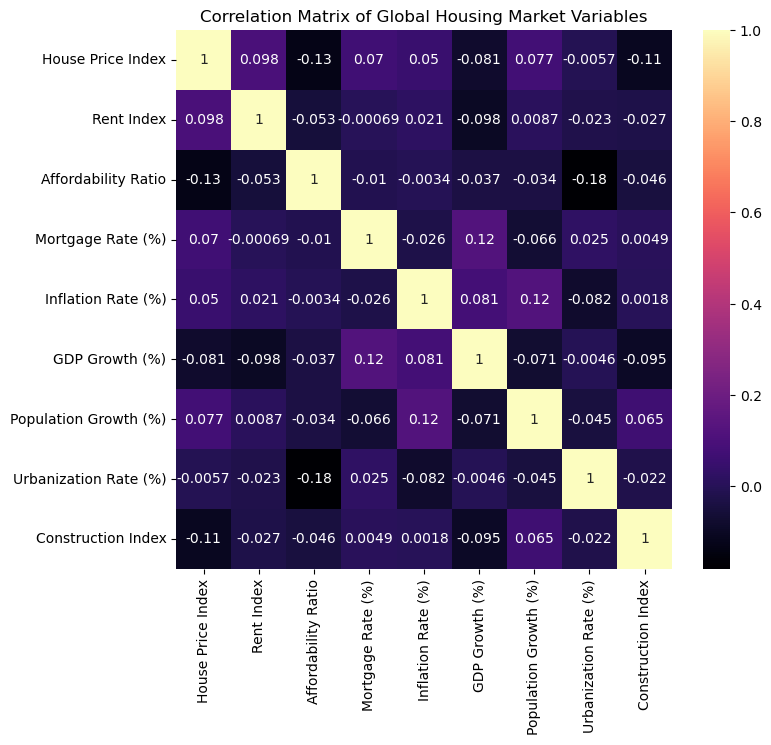

In [682]:
plt.figure(figsize=(8,7))

# compile all numerical columns into a callable variable for convenience 
numerical_columns = df_new[['House Price Index','Rent Index','Affordability Ratio','Mortgage Rate (%)','Inflation Rate (%)','GDP Growth (%)','Population Growth (%)','Urbanization Rate (%)','Construction Index']]
plt.title('Correlation Matrix of Global Housing Market Variables')

# create a heatmap to visualize the correlation between the numerical columns
sns.heatmap(numerical_columns.corr(), cmap='magma', annot=True)
plt.savefig("final_corr.png")

**Interpretation**: 

The strongest **positive** correlations:
* Mortgage Rate and GDP Growth (0.12)
* Rent Index and House Price Index (0.098)
* Population Growth and House Price Index (-0.77)
  
The strongest **negative** correlations:
* Urbanization Rate and Affordability Ratio (-0.18)
* Affordability Ratio and House Price Index (-0.13)
* Construction Index and House Price Index (-0.11)

**Why it matters**:
* There is no strong correlation between any of the variables, meaning that the factors of the housing market largely vary independently from each other, but there are some that are more related and indirectly imapct each other more than others.
* In this way, comparing different countries to each other and changes of the variables over time will be the most effective analysis.

---

Let's compare the House Price Index between countries with a bar graph.

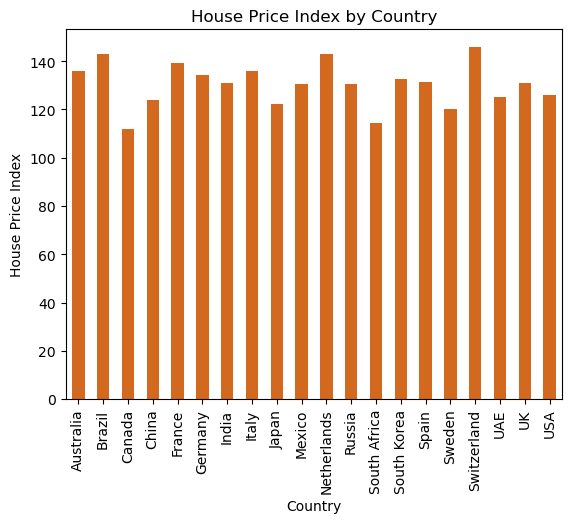

In [672]:
# filter the House Price Index data by Country, calculating the average for each
house_price_by_country = df_new.groupby('Country')['House Price Index'].mean()

# create a bar graph with this data
house_price_by_country.plot(kind='bar', x='Country',y='House Price Index', color='chocolate')
plt.title('House Price Index by Country')
plt.ylabel('House Price Index')
plt.xlabel('Country')
plt.savefig("final_bar.png")

**Interpretation**: 
* The House Price Index varies by at most 40 between the countries
* Countries with the lowest values:
    * Canada, South Africa, Sweden
* Countries with the highest value:
    * Switzerland, Brazil, Netherlands

**Why it matters**:
* At the least, this graph shows that is a relative consistency between the house prices in the  of major countries on a world stage
    * of those that are included, there is a saturation of western countries that tend to have mixed market economies. In this way their economies may behave similarly and hold similar fundamental characteristics such as house prices. 

---

Next, lets look at a histogram mapping the frequency of Mortgage Rate percentages.

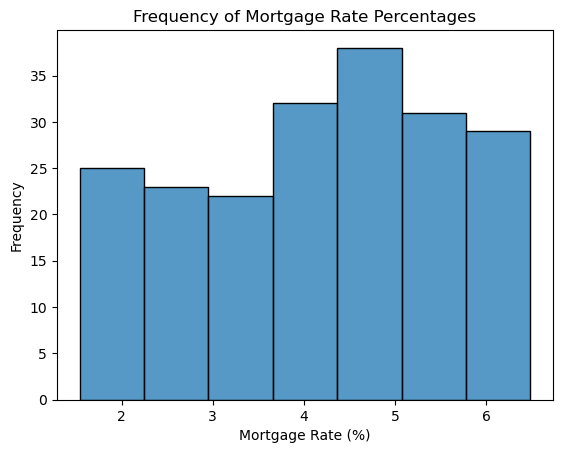

In [670]:
# create a histogram with the Mortgage Rate column as the x-axis
sns.histplot(data=df_new,x='Mortgage Rate (%)', bins=7) # 7 bins because the highest percentage is about 6.5
plt.title('Frequency of Mortgage Rate Percentages')
plt.xlabel('Mortgage Rate (%)')
plt.ylabel('Frequency')
plt.savefig("final_hist.png")

**Interpretation:** 
* The mode of the data is in the interval of about 4.3% - 5%
* The graph is nearly uniform, but contains a slight peak between 4% and 5% 

**Why it matters:** 
* The mortgage rates between about 1.5 and 6.5 are almost equally likely to appear throughout the dataset, but  percentages between 4% and 5% are slightly most likely to appear

---

Now, let's try a scatterplot of the relationship between House Price Index and Rent Index.

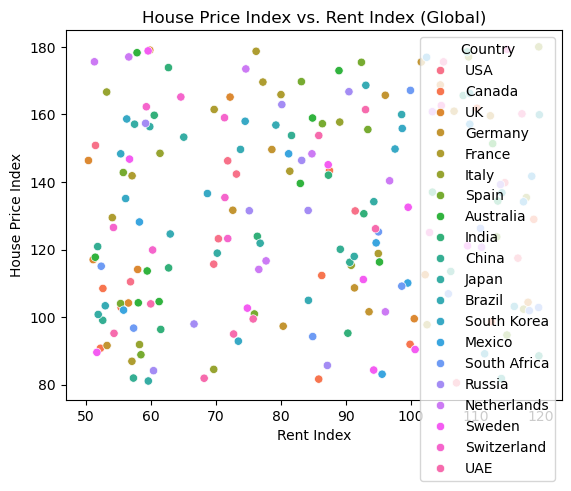

In [664]:
# create a scatterplot comparing Rent Index and House Price Index, color the datapoints by Country
sns.scatterplot(data=df_new, x='Rent Index',y='House Price Index', hue='Country') 
plt.title('House Price Index vs. Rent Index (Global)')
plt.ylabel('House Price Index')
plt.xlabel('Rent Index')
plt.savefig("final_scatter1.png")

**Interpretation**:
* No correlation
* No pattern

**Why it matters**:
* The most that this graph shows is how each country has a different pattern of correlation between the two variables
* It will be more helpful to single countries to investigate this variation 

---

Let's look at one country alone. 

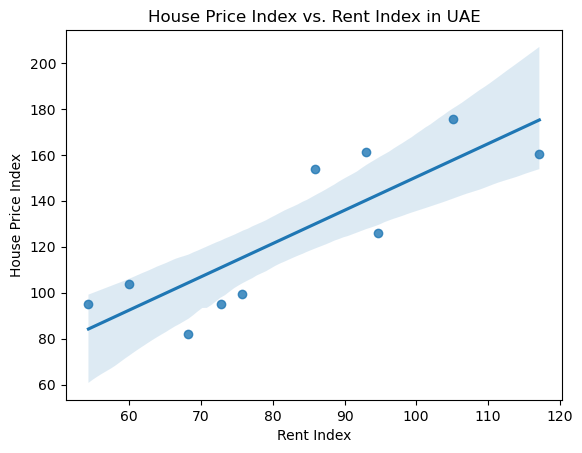

In [666]:
# filter the data to be from the UAE
df_UAE = df_new[df_new['Country'] == 'UAE']

# create a graph comparing Rent Index and House Price Index with this filtered data 
sns.regplot(data=df_UAE, x='Rent Index',y='House Price Index')
plt.title('House Price Index vs. Rent Index in UAE')
plt.ylabel('House Price Index')
plt.xlabel('Rent Index')
plt.savefig("final_scatter_UAE.png")

**Interpretation**:
* Strong correlation
* Positive upward trend

**Why it matters**:
* There is a strong relationship of direct variation between House Price Index and Rent Index in the UAE. When one increases, the other does as well.

---

Let's check the correlation matrix of the UAE alone.

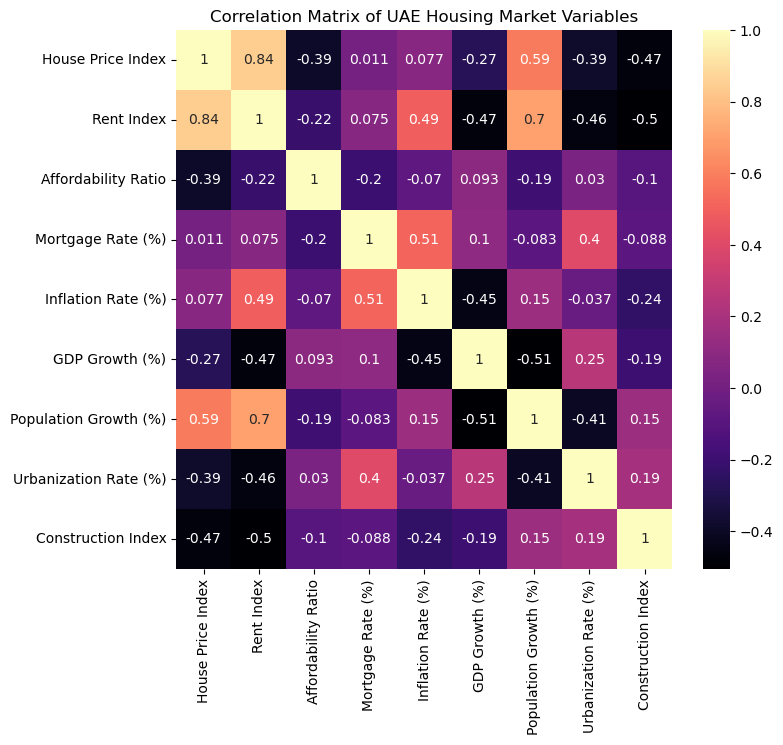

In [700]:
plt.figure(figsize=(8,7))


# compile all numerical columns into a callable variable for convenience 
numerical_columns = df_UAE[['House Price Index','Rent Index','Affordability Ratio','Mortgage Rate (%)','Inflation Rate (%)','GDP Growth (%)','Population Growth (%)','Urbanization Rate (%)','Construction Index']]
plt.title('Correlation Matrix of UAE Housing Market Variables')

# create a heatmap to visualize the correlation between the numerical columns
sns.heatmap(numerical_columns.corr(), cmap='magma', annot=True)
plt.savefig("final_corr2")

**Interpretation**:
* This looks incredibly different from the correlation map for the entire dataset
* The strongest **positive** correlations:
    * House Price Index and Rent Index (0.84)
    * Population Growth and Rent Index (0.7)
    * Population Growth and House Price Index (0.59) 
* The strongest **negative** correlations:
    * Population Growth and GDP Growth (-0.51)
    * Construction Index and Rent Index (-0.5)
    * Constuction Index and House Price Index (-0.47)

**Why it matters**:
* This proves that there are regional differences because correlation visualizations to understand the relationships between variables are most effective when viewing a country singularly.

---

Next, we can visualize the trend of the Affordability Ratio with a line graph.

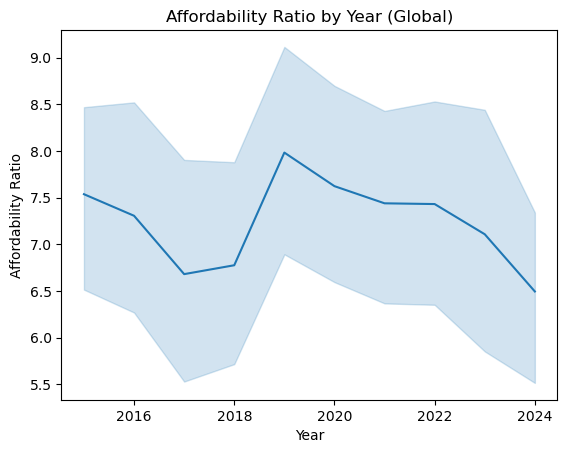

<Figure size 640x480 with 0 Axes>

In [689]:
# create a line graph for the Affordability Ratio over time globally
sns.lineplot(data=df_new,x='Year',y='Affordability Ratio')
plt.title('Affordability Ratio by Year (Global)')
plt.xlabel('Year')
plt.ylabel('Affordability Ratio')
plt.show() # display
plt.savefig("final_line0.png")

**Interpretation**:
* Overall downward trend with a single increase peak in 2019
* The lowest point was previously in 2017
* The lowest is now in the present tense, if the downward trend continues

**Why it matters**: 
* Around the globe, housing was most affordable in 2019
* Housing was previously least affordable in 2017, but now it appears to be at its lowest in 2024 and this year, if the trend continues
* This graph is an extraction of the data based on time, which will also yeild better results than a graph of the entire dataset

---

Now, let's try a geomap of the House Price Index!

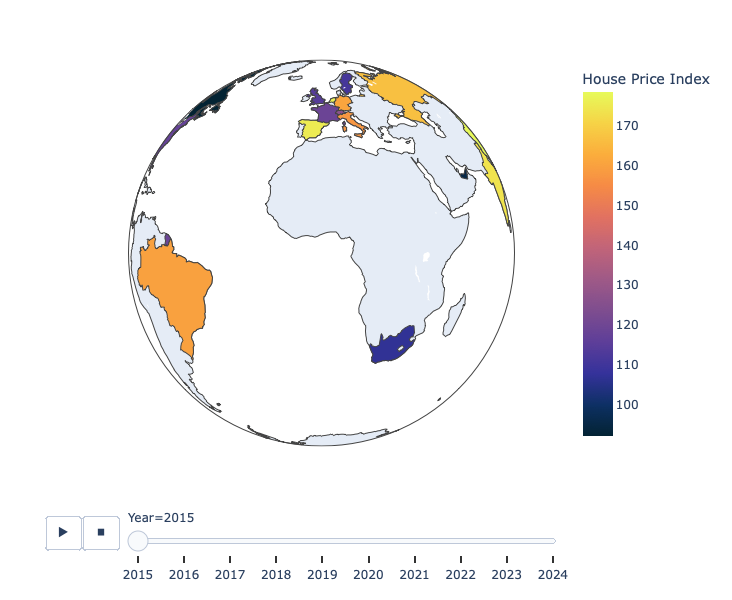

<Figure size 640x480 with 0 Axes>

In [695]:
# create a figure from plotly's library 
fig = px.choropleth(df_new,
                    locations='Code', # use the Code column we created 
                    color='House Price Index', # create a gradient from the House Price Index
                    hover_name='Country', # Get the names of each country when cursor hovers over them
                    animation_frame='Year', # animation to see the changes over time 
                    projection='orthographic', # 3D globe figure 
                    color_continuous_scale='thermal', # customize the colorway
                    height=600) # set graph size 
fig.show() # display 
plt.savefig("final_geo.png")

**Interpretation**: 
* Each country varies intependently from each other
* There have been significant fluctuations in the afforbility ratio over time
  
**Why it matters**:
* Compared to our analysis of the House Price Index (viewing the years 2017, 2019, and 2024), there is not a direct overall match of price increases and decreases to be the causal factor of affordability. The additional factor is likely the GDP Growth to evaluate the health of the economy.

---

### **INSIGHTS AND GENERALIZATIONS**

**Summary of findings**:
Although there is a collective effect of change in housing affordability globally, each country differs independently from the others. There have been fluctuations in the housing market, to where the prices were housing was most affordable in 2019 and is becoming the least affordable now, since 2015. The economic factors that align with rising housing costs are mainly Population Growth, GDP Growth, and Urbanization Rate. A limitation of the dataset is that there is a saturation of western and European countries, largely excluding the global south and east. The majority of African continent is missing, which shows a bias in data collection. 

---

### **ADDITIONAL RESEARCH QUESTIONS**

How does the economy type affect the factors? Capitalism vs. Socialism (USA vs. China)

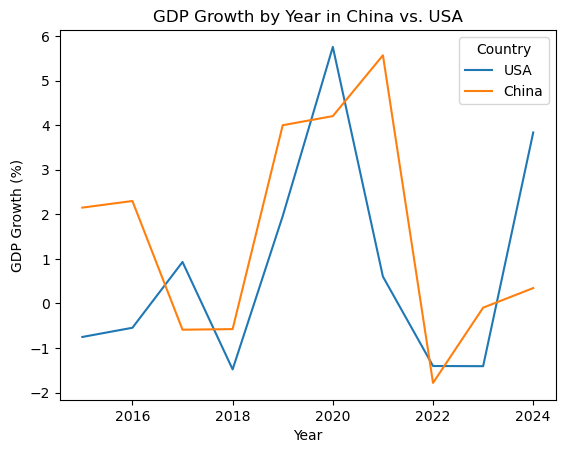

<Figure size 640x480 with 0 Axes>

In [642]:
# filter the data to be from the USA and China
df_USA_CHN = df_new[df_new['Country'].isin(['China','USA'])].reset_index()

# create a lineplot to compare GDP Growth over time with this data
sns.lineplot(data=df_USA_CHN,x='Year',y='GDP Growth (%)', hue='Country')
plt.title('GDP Growth by Year in China vs. USA')
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.show()

plt.savefig("final_USCHN_line.png")

**Interpretation**: 
* The countries follow similar trends in economic health, however the US is increasing in GDP Growth towards the present tense, while China has decreased

**Why it matters:** 
* From what I know about China's economic trends today, I believe it is about to face a housing crisis, which is indicadted by the lack of recovery from the most recent drop in GDP Growth.
* I believe the United States is putting less limits on the economy in the present day, so the GDP Growth of investors and businessmen might be the extreme upward trend of the graph

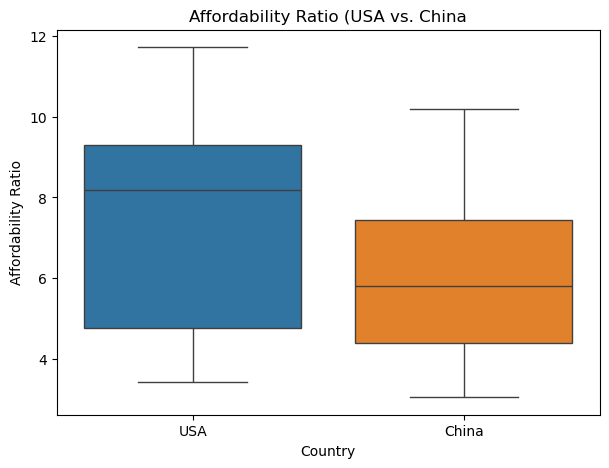

<Figure size 640x480 with 0 Axes>

In [650]:
# create a box plot to compare House Price Index over time between the two countries

#Boxplot with outlier
plt.figure(figsize=(7,5)) # adjust graph size
plt.tight_layout() # better spacing 
sns.boxplot(data=df_USA_CHN, x='Country',y='Affordability Ratio', hue='Country')
plt.title('Affordability Ratio (USA vs. China')
plt.ylabel('Affordability Ratio')
plt.xlabel('Country')
plt.show()

plt.savefig("final_USCHN_box.png")

**Interpretation**: 
* The US has more variability than China
* The median of China is lower than the median of the US

**Why it matters**: 
* There seems to be more consistency in the affordability ratio for China and a lower median value, compared to the US.
* The variation in the US could be due to the free market approach, whereas China has a more centrally controlled market 

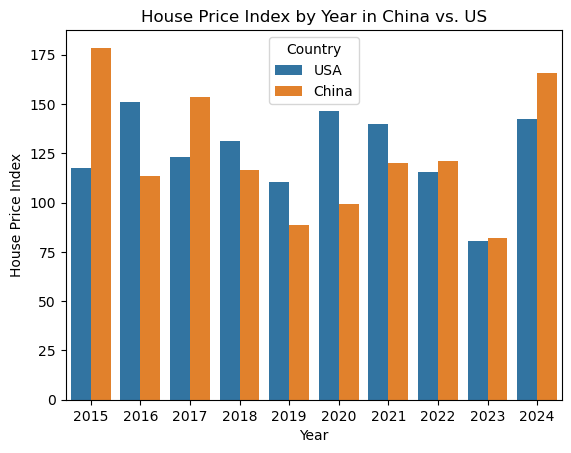

<Figure size 640x480 with 0 Axes>

In [691]:
# create a bar plot to compare House Price Index over time between the two countries
sns.barplot(data=df_USA_CHN,x= 'Year', y='House Price Index', hue='Country')
plt.title('House Price Index by Year in China vs. US')
plt.xlabel('Year')
plt.ylabel('House Price Index')
plt.show()
plt.savefig("final_bar2.png")

**Interpretation**: 
* The US and China follow similar trends by year
* At the beginning and end of the dataset, China has the highest house price index

**Why it matters**:
* It is interesting to see how the housing prices have changed over the years, knowing the context of the affordability trends in each country.

---

**Summary**: 

I cannot distinctly pinpoint the effect of the two different economic ideologies at play in the US and China, but it is insightful to keep them in mind when analyzing the difference in their trends of the different factors in the housing market over time.

---

In [702]:
df_new.to_csv('global_housing_market_extended_cleaned.csv')